In [ ]:
# Command line to make all necessary imports to setup the query environment

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib 

from datetime import datetime, timedelta

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [55]:
# Defining the Time Element or Range

In [56]:
end_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=90)).strftime('%Y-%m-%d')

In [57]:
# Defining the URL for the API

In [58]:
import requests

In [59]:
url = f"https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/{start_date}/{end_date}?adjusted=true&sort=asc&apiKey=g9UBSvLUVN6M4MtRKT4eSokSca71CXUn"

In [60]:
api_data = requests.get(url).json()

In [61]:
# Create DataFrame from API Response, Process and Rename Columns

In [62]:
apple_df = pd.DataFrame(api_data['results'])
apple_df['date'] = pd.to_datetime(apple_df['t'], origin='unix', unit='ms')
apple_df = apple_df.set_index('date')

mapping = {  # Creating a mapping dictionary for renaming columns    
            'o': 'open',  # Rename 'o' to 'open'    
            'c': 'close',  # Rename 'c' to 'close'    
            'h': 'high',  # Rename 'h' to 'high'    
            'l': 'low',  # Rename 'l' to 'low'    
            'n': 'number',  # Rename 'n' to 'number'    
            'v': 'volume',  # Rename 'v' to 'volume'    
            'vw': 'avg_price'  # Rename 'vw' to 'avg_price' 
}

apple_df = apple_df.rename(columns=mapping)
plt.show()

In [63]:
# Plotting the 'close' prices

<Axes: title={'center': 'Apple Stock Close Prices'}, xlabel='date'>

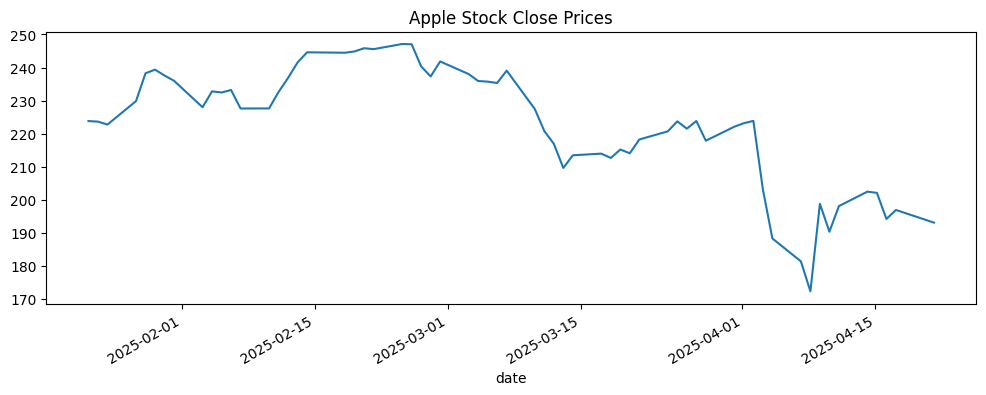

In [64]:
apple_df['close'].plot(figsize=(12, 4), title='Apple Stock Close Prices')

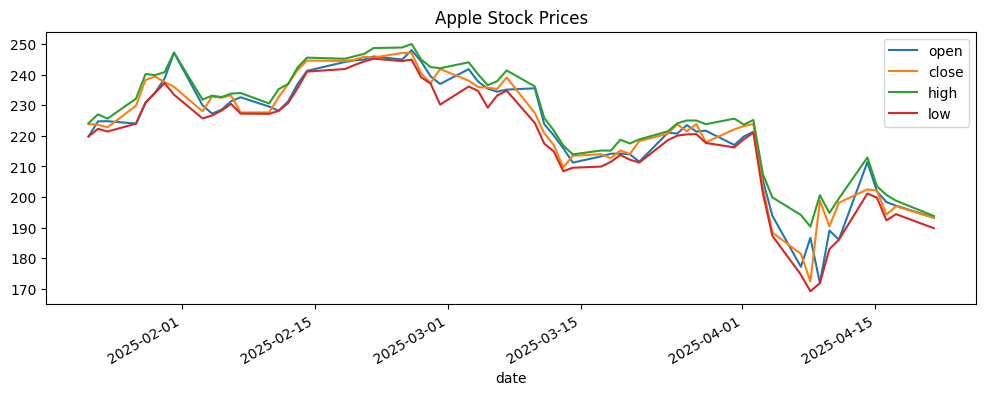

In [65]:
apple_df[['open', 'close', 'high', 'low']].plot(figsize=(12, 4), title='Apple Stock Prices')
plt.show()

In [66]:
#Importing the Chellenge Results

In [67]:
from nbresult import ChallengeResult

In [68]:
# Create a result object to validate the DataFrame structure

In [72]:
result = ChallengeResult('apple',    index_name=apple_df.index.name,   
                                           index_type=apple_df.index.dtype,    
                                                 columns=apple_df.columns  
                        )

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/francis/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/francis/code/FOKanu/02-Data-Toolkit/02-Data-Sourcing/data-stock-market-api/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.25s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master

